# Data visualization

In [94]:
import os 
import numpy as np
import pandas as pd

INPUT_PATH = '../data'
TRAIN_TEST_DATA = os.path.join(INPUT_PATH, 'imgs')
TRAIN_CSV_PATH = os.path.join(INPUT_PATH, 'train.csv')
TEST_CSV_PATH = os.path.join(INPUT_PATH, 'test.csv')

CLASS_CODES_DF = pd.read_csv(os.path.join(INPUT_PATH, 'class_codes.csv'))
TRAIN_CSV_DF = pd.read_csv(TRAIN_CSV_PATH)
TEST_CSV_DF = pd.read_csv(TEST_CSV_PATH)

train_ids = TRAIN_CSV_DF['id'].values
train_classes = TRAIN_CSV_DF['class'].values

In [2]:
import cv2

def get_filename(image_id, image_type):
    """
    Method to get image file path from its id and type
    """
    check_dir = False
    ext = ''
    prefix = '' 
    if "Train" in image_type: 
        data_path = TRAIN_TEST_DATA
    elif "Test" in image_type:
        data_path = TRAIN_TEST_DATA
    else:
        raise Exception("Image type '%s' is not recognized" % image_type)

    if check_dir and not os.path.exists(data_path):
        os.makedirs(data_path)
    if len(ext) > 0:
        return os.path.join(data_path, "{}{}.{}".format(prefix, image_id, ext))
    return os.path.join(data_path, "{}{}".format(prefix, image_id, ext))    
    

_gb = TRAIN_CSV_DF.groupby('id')
_id_class_gb = _gb['class']    
    
def get_label(image_id, image_type):
    return _id_class_gb.get_group(image_id)

    
def get_image_data(image_id, image_type):
    fname = get_filename(image_id, image_type)
    img = cv2.imread(fname)
    assert img is not None, "Failed to read image : %s, %s" % (image_id, image_type)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

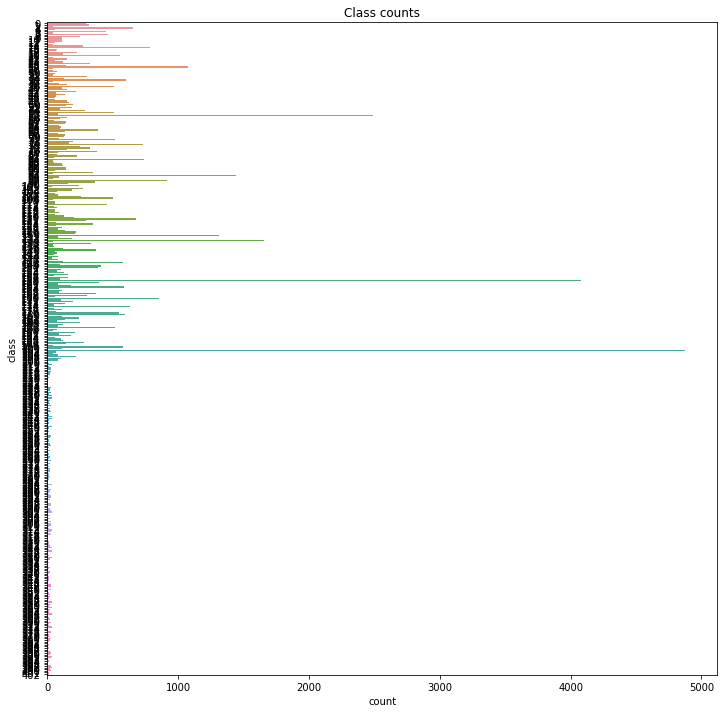

In [4]:
plt.figure(figsize=(12, 12))
plt.title("Class counts")
sns.countplot(y='class', data=TRAIN_CSV_DF, orient='h')

In [5]:
class_id_gb = TRAIN_CSV_DF.groupby('class')
class_count = class_id_gb['class'].count()

In [6]:
class_count.describe()

count     403.000000
mean      144.791563
std       384.923778
min         4.000000
25%        15.500000
50%        42.000000
75%       130.000000
max      4875.000000
Name: class, dtype: float64

In [7]:
rare_classes = class_count[class_count < class_count.mean()].sort_values()

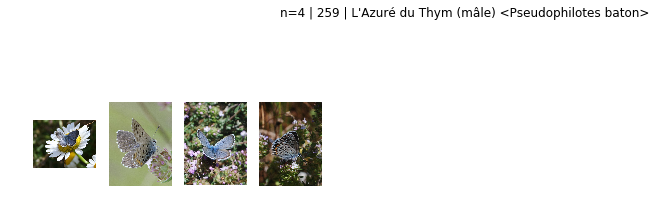

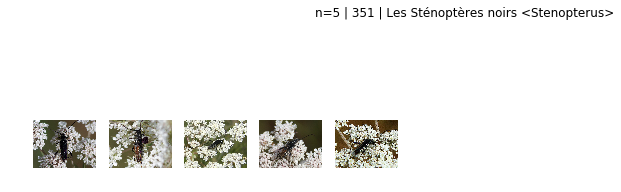

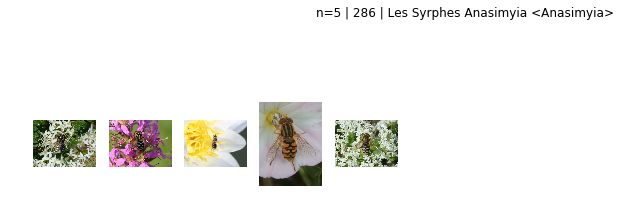

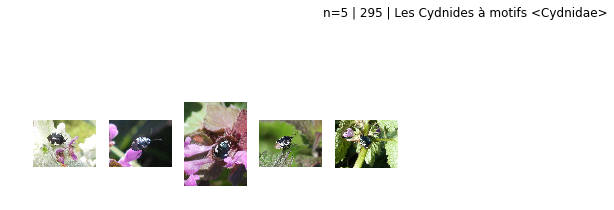

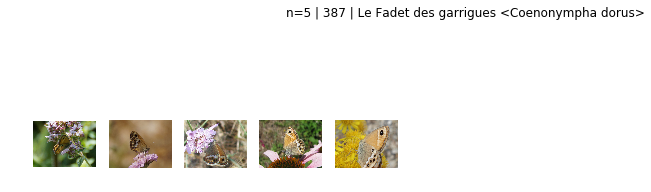

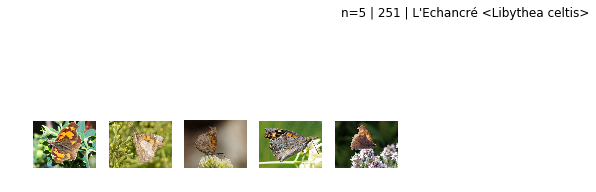

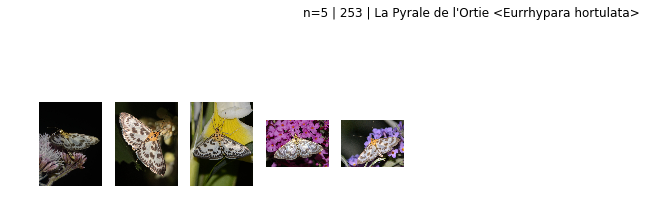

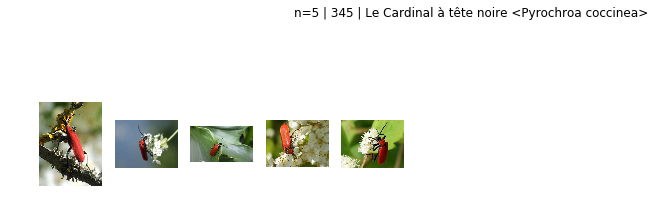

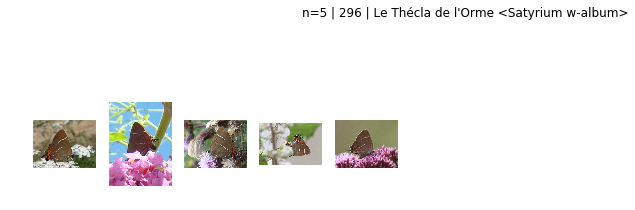

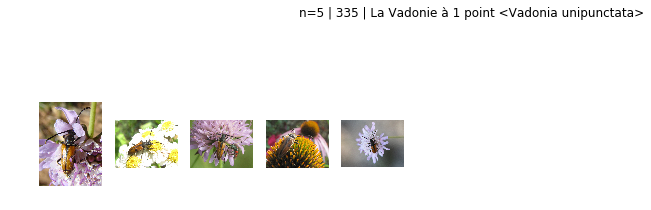

In [9]:
for rare_class in rare_classes.index[:10]:
    rare_class_ids = class_id_gb.get_group(rare_class)['id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    plt.suptitle("n=%i | %i | " % (len(rare_class_ids), rare_class) + CLASS_CODES_DF.loc[rare_class, 'taxa_name'])

    for image_id in rare_class_ids.values:    
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(get_image_data(image_id, "Train"))
        plt.axis('off')

        counter += 1     

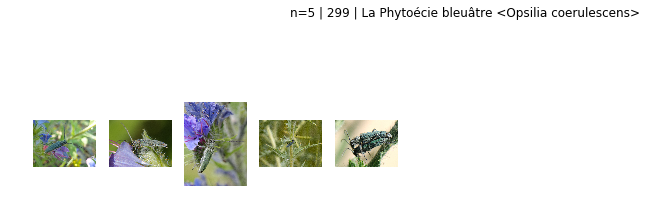

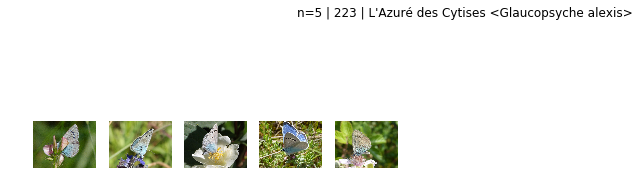

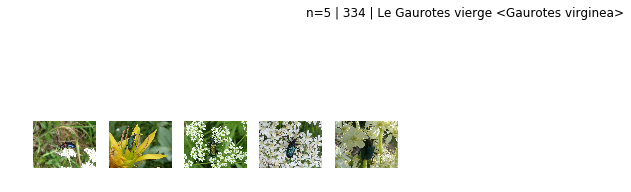

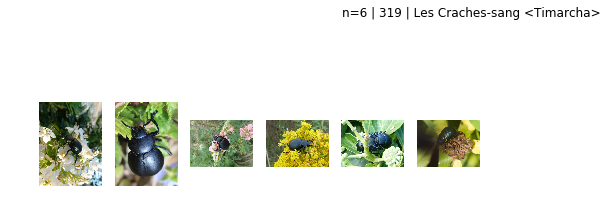

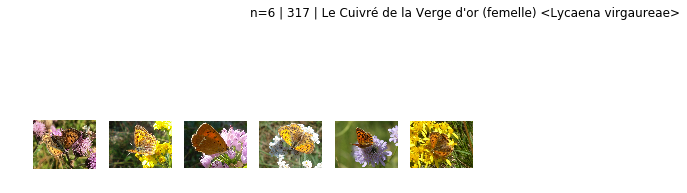

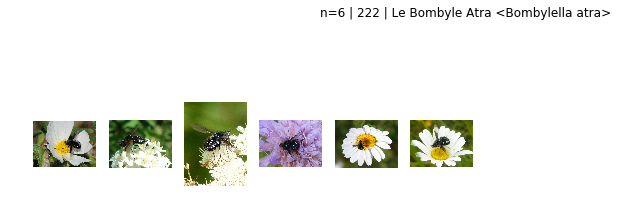

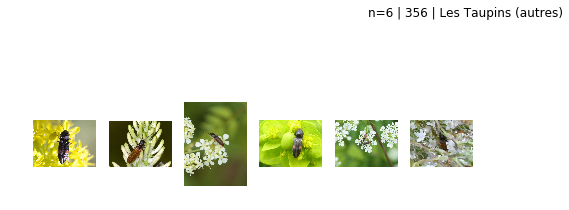

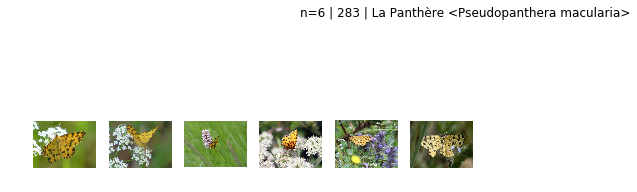

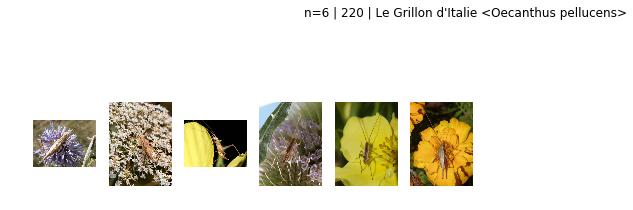

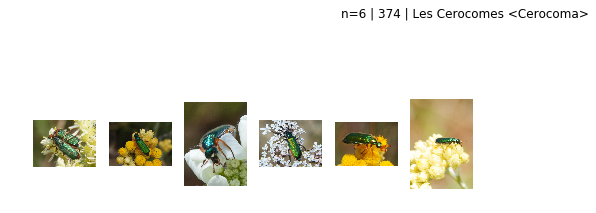

In [10]:
for rare_class in rare_classes.index[10:20]:
    rare_class_ids = class_id_gb.get_group(rare_class)['id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    plt.suptitle("n=%i | %i | " % (len(rare_class_ids), rare_class) + CLASS_CODES_DF.loc[rare_class, 'taxa_name'])

    for image_id in rare_class_ids.values:    
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(get_image_data(image_id, "Train"))
        plt.axis('off')

        counter += 1     

In [19]:
most_freq_classes = class_count[class_count == 4875].sort_values()

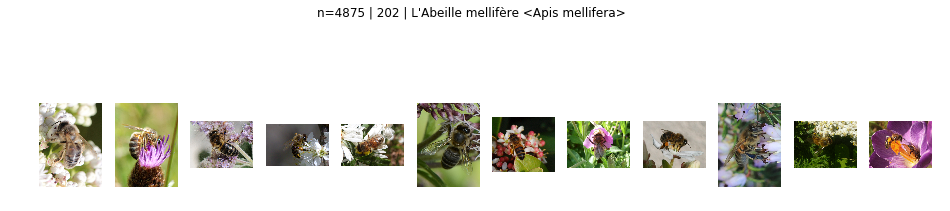

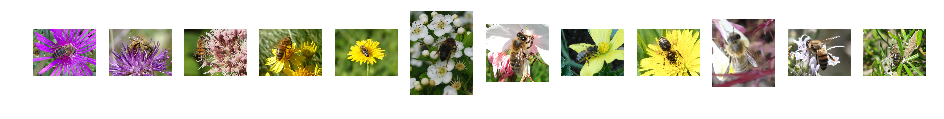

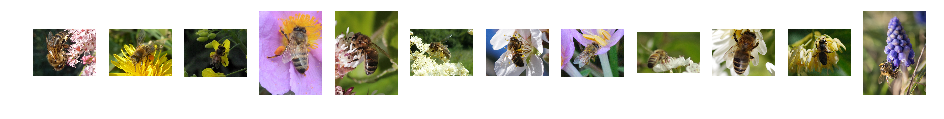

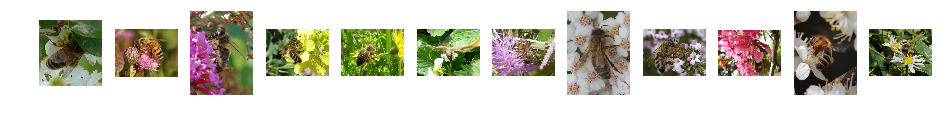

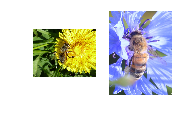

In [20]:
for most_freq_class in most_freq_classes.index:
    most_freq_class_ids = class_id_gb.get_group(most_freq_class)['id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    plt.suptitle("n=%i | %i | " % (len(most_freq_class_ids), most_freq_class) + CLASS_CODES_DF.loc[most_freq_class, 'taxa_name'])

    for image_id in most_freq_class_ids.values[:50]:    
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(get_image_data(image_id, "Train"))
        plt.axis('off')

        counter += 1     

## Categories

Let's introduce categories that groups several classes by generic insect description. For example, there are classes of bees ('Abeille'): 
- Les Abeilles à abdomen rouge
- L'Abeille Ceratina noire
- Les Abeilles Ceratina bleutées 
- Les Abeilles Hylaeus à taches blanches 
- Les Abeilles difficiles à déterminer 
- L'Abeille mellifère
- ...

We can group all such classes in the categorie 'Abeille'

In [56]:
CATEGORIES = ['Abeille', u'Guêpe', 'Hespérie', 'Mélitée', 'Sauterelle', 
              'Punaise', u'Hélophile', u'Carte géographique', 'Eristale', 
              'Pucerons', 'Téphritide', 'Terebrant', 'Tachinaire', 'Bourdon', 
              'Tortue', 'Scolie', 'Chenille', 'Araignée', 'Pentatome', 'Longicorne', 
              'Mouche', 'Halicte']

In [115]:
CATEGORIES = sorted(CLASS_CODES_DF['taxa_name'].str.replace(r'(Les |La |L\'|Le |Petit.?|Grand.?| et| autres)', '') \
                            .str.strip() \
                            .str.split(' ') \
                            .apply(lambda x: x[0]) \
                            .apply(lambda x: x[:-1] if x[-1] == 's' else x) \
                            .unique())

In [116]:
len(CATEGORIES), CATEGORIES

(202,
 ['Abeille',
  'Adèle',
  'Agapanthie',
  'Agreste',
  'Amarylli',
  'Ammophile',
  'Andrène',
  'Anthaxie',
  'Anthidie',
  'Anthophore',
  'Anthracine',
  'Apion',
  'Apollon',
  'Araignée',
  'Argu',
  'Arlequinette',
  'Asilide',
  'Athalie',
  'Aurore',
  'Azuré',
  'Balanin',
  'Belle-Dame',
  'Bibion',
  'Blatte',
  'Bombyle',
  'Bourdon',
  'Bruche',
  'Brun',
  'Bupreste',
  'Cantharide',
  'Capricorne',
  'Cardinal',
  'Carte',
  'Casside',
  'Cerocome',
  'Charançon',
  'Chenille',
  'Chloromyie',
  'Chloropide',
  'Chrysanthie',
  'Chryside',
  'Chrysomèle',
  'Chrysope',
  'Chrysotoxe',
  'Cimbicide',
  'Citron',
  'Clairon',
  'Clyte',
  'Clytre',
  'Coccinelle',
  'Collembole',
  'Collète',
  'Coléoptère',
  'Conopide',
  'Coréide',
  'Craches-sang',
  'Criocère',
  'Criquet',
  'Cryptocéphale',
  'Cuivré',
  'Cydnide',
  'Céphale',
  'Céphide',
  'Cétoine',
  'Damier',
  'Dasytide',
  'Demi-Deuil',
  'Dermeste',
  'Diane',
  'Dinoptère',
  'Drap',
  'Ecaille',
  '

In [123]:
CLASS_CODES_DF.loc[:, 'cat'] = 0
CLASS_CODES_DF['cat'].astype(int)
for i, cat in enumerate(CATEGORIES):
    mask = CLASS_CODES_DF['taxa_name'].str.contains(cat)
    CLASS_CODES_DF.loc[mask, 'cat'] = i

In [124]:
CLASS_CODES_DF.head()

,class,taxa_name,cat
0,0,"Les Hespéries fauves <Ochlodes, Thymelicus>",97
1,1,"Les Guêpes Vespula <Vespula, Dolichovespula>",93
2,2,La Mélitée orangée <Melitaea didyma>,123
3,3,Les Sauterelles <Tettigonoidea>,155
4,4,Les Punaises prédatrices ternes,145


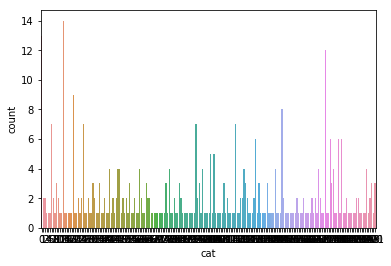

In [125]:
sns.countplot(CLASS_CODES_DF['cat'])

In [141]:
class_cat_gb = CLASS_CODES_DF.groupby('class')['cat']

In [146]:
class_cat_gb.get_group(0).values[0]

97

In [147]:
TRAIN_CSV_DF['cat'] = TRAIN_CSV_DF['class'].apply(lambda x: cat_class_gb.get_group(x).values[0])

In [148]:
TRAIN_CSV_DF.head()

,id,class,cat
0,70709,124,117
1,50750,159,77
2,10684,117,136
3,66697,121,49
4,47847,108,115


In [150]:
cat_count = TRAIN_CSV_DF.groupby('cat').count()

In [151]:
cat_count.describe()

,id,class
count,202.000000,202.000000
mean,288.866337,288.866337
std,769.254486,769.254486
min,5.000000,5.000000
25%,27.000000,27.000000
50%,91.500000,91.500000
75%,246.250000,246.250000
max,6405.000000,6405.000000


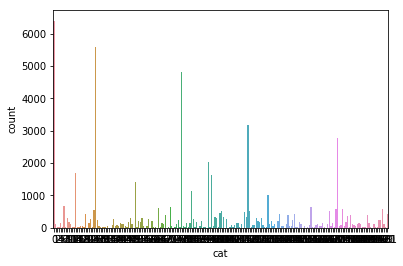

In [149]:
sns.countplot(TRAIN_CSV_DF['cat'])

Visualize a class

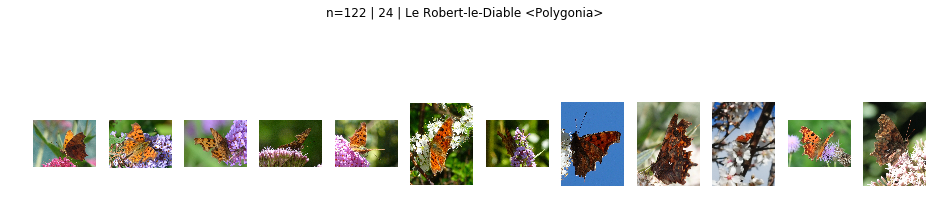

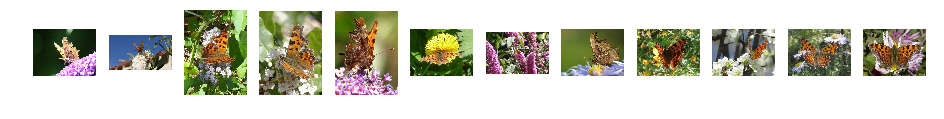

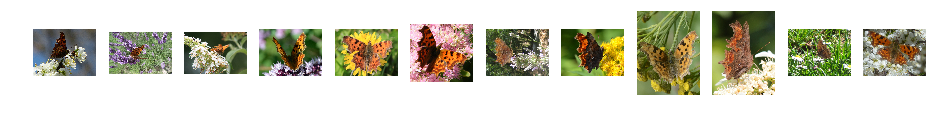

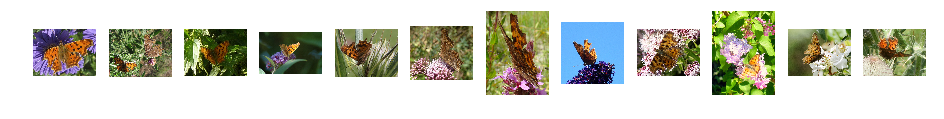

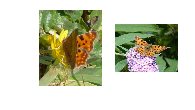

In [61]:
for _class in [24,]:
    _class_ids = class_id_gb.get_group(_class)['id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    plt.suptitle("n=%i | %i | " % (len(_class_ids), _class) + CLASS_CODES_DF.loc[_class, 'taxa_name'])

    for image_id in _class_ids.values[:50]:    
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(get_image_data(image_id, "Train"))
        plt.axis('off')

        counter += 1     